# Polynomial Regression

🔍 Car Price Prediction Using Polynomial Regression (Degree 2)

As part of my data science journey, I built a Polynomial Regression model to predict used car prices based on their age, analyzing real-world-style data to understand depreciation trends.

**📌 Project Objective:**

To accurately predict a car’s resale price using key input features, primarily focusing on:

Age of the Car (in years)

**📊 Tools & Technologies:**

Python

Pandas, NumPy for data preprocessing and analysis

Matplotlib, Seaborn for data visualization

Scikit-learn for regression modeling and evaluation


**📷 Key Visualizations & Insights:**

✅ Scatter plots revealed a strong negative correlation between age and price
📦 Box plots were used to detect outliers and data distribution
📈 Polynomial regression curve clearly captured the downward price trend
🔍 Actual vs Predicted plots validated model accuracy

**🧠 Model Details:**

Model Types Used: Linear Regression & Polynomial Regression (degree 2)

Feature Used: Car Age

Target Variable: Car Price

Data Split: 80% training, 20% testing

Evaluation Metric: R² Score

**📈 Model Performance:**

Linear Regression R² Score:
✅ Train: 0.711
✅ Test: 0.701

Polynomial Regression R² Score:
✅ Train: 0.863
✅ Test: 0.864

💡 Polynomial Regression showed significant improvement over Linear Regression, indicating a non-linear relationship between car age and price.

**📸 Snapshots from the project include:**

Dataset preview and feature analysis

Scatter plots & box plots for EDA

Fitted regression lines (linear vs polynomial)

Actual vs Predicted price comparison

💬 This project improved my understanding of polynomial modeling, visual analysis, and the importance of choosing the right model for non-linear data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from csv file by using Pandas
df = pd.read_csv("Polynomial Dataset.csv")
df.head(10)

,years,price
0,18,500
1,23,750
2,29,850
3,25,950
4,20,1112
5,24,1250
6,32,1250
7,25,1250
8,27,1400
9,28,1425


In [2]:
# get the data frame infromation by using Pandas info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   years   1177 non-null   int64
 1   price   1177 non-null   int64
dtypes: int64(2)
memory usage: 18.5 KB


In [3]:
# get all the statistical information such as count, mean, median, standerd deviation, 25%, 50%,....etc. by using Pandas describe() function
df.describe()

,years,price
count,1177.000000,1177.000000
mean,14.723874,9729.793543
std,5.543678,8715.158180
min,1.000000,500.000000
25%,10.000000,4400.000000
50%,15.000000,6750.000000
75%,18.000000,13425.000000
max,32.000000,62327.000000


<Axes: >

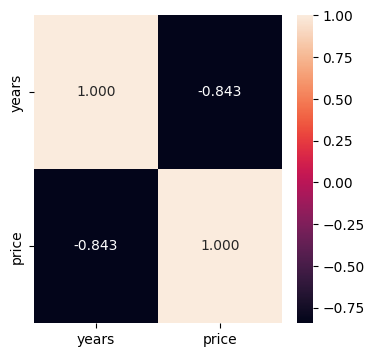

In [4]:
# Visualize the hash map to identify correlations between the features.
plt.figure(figsize=(4, 4))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

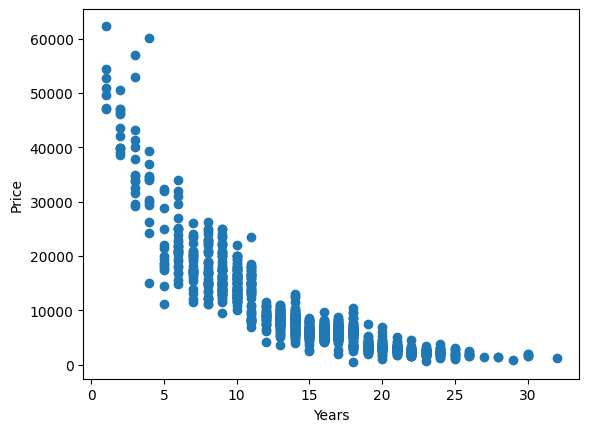

In [5]:
# Draw a scatter plot to observe the linear relationship between the variables
plt.scatter(df["years"], df["price"])
plt.xlabel("Years")
plt.ylabel('Price')
plt.show()

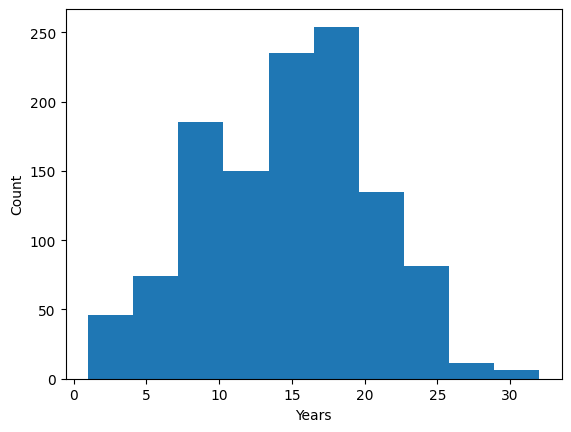

In [6]:
# Generate a histogram to visually check if the data follows a normal distribution.
plt.hist(df["years"])
plt.xlabel("Years")
plt.ylabel('Count')
plt.show()

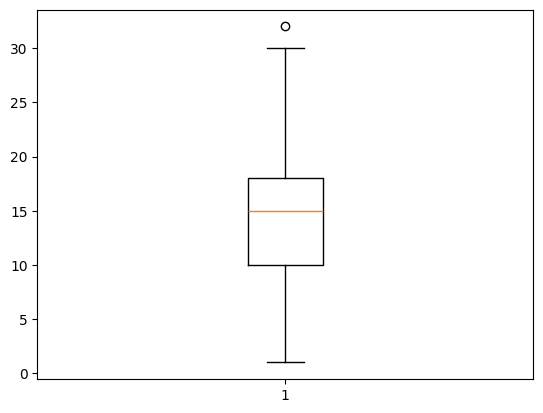

In [7]:
# Draw a boxplot to detect the presence of outliers in the data
plt.boxplot(df["years"])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Independent Features are --> 'Hours Studied', 'Previous Scores'
# Dependent Feature is --> "Performance Index"

# Split the dataset into two parts: 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(df[["years"]], df["price"], test_size=0.2, random_state=10)

# Build a Linear Regression Model
reg = LinearRegression()

# Fit the Linear Regression model with the training data
reg.fit(x_train, y_train)

# Calculate and return the R² score on the training data
train_score = reg.score(x_train, y_train)

# Calculate and return the R² score on the testing data
test_score = reg.score(x_test, y_test)

print("Linear Regression Training Score", train_score)
print("Linear Regression Testing Score", test_score)

Linear Regression Training Score 0.7113737819146251
Linear Regression Testing Score 0.7006880855511197


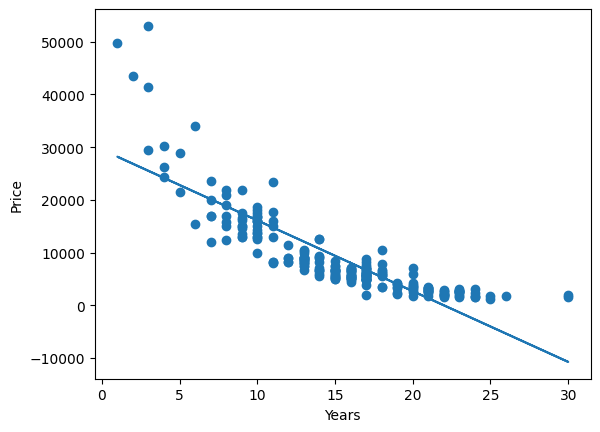

In [9]:
# Visualized the predictions by plotting the linear regression line, enabling a clear comparison between predicted and actual values
y_prediction = reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction)
plt.xlabel("Years")
plt.ylabel('Price')
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create polynomial features of degree 2 (quadratic)
poly = PolynomialFeatures(2)

# Transform the training and testing input features to include polynomial terms
new_x_train = poly.fit_transform(x_train)
new_x_test = poly.transform(x_test)

# Initialize a Linear Regression model (used for polynomial regression after transformation)
plr = LinearRegression()

# Fit the polynomial regression model using the transformed training data
plr.fit(new_x_train, y_train)

# Print the R² score for both training and testing datasets
print("Polynomial Regression Training Score:", plr.score(new_x_train, y_train))
print("Polynomial Regression Testing Score:", plr.score(new_x_test, y_test))


Polynomial Regression Training Score: 0.8629836077687564
Polynomial Regression Testing Score: 0.864198125470772


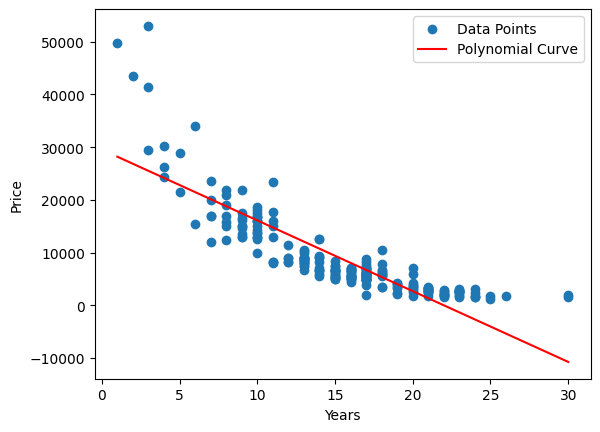

In [11]:
# Convert to NumPy arrays if they're Pandas Series
x_test_np = x_test.values
# Flatten and sort
sorted_indices = np.argsort(x_test_np.flatten())
x_sorted = x_test_np.flatten()[sorted_indices]
y_sorted = y_prediction.flatten()[sorted_indices]
# Plotted the polynomial regression curve (degree 2) to visualize how well the model fits the data and captures non-linear patterns in the predictions.
plt.scatter(x_test_np, y_test, label='Data Points')
plt.plot(x_sorted, y_sorted, color='red', label='Polynomial Curve')
plt.xlabel("Years")
plt.legend()
plt.ylabel('Price')
plt.show()

In [12]:
# Predict the target variable using the transformed test data
y_prediction = plr.predict(new_x_test)
# Create a DataFrame to compare actual and predicted values
df2 = pd.DataFrame()
df2["x_test"] = x_test.values.flatten()      # Flattening to match the shape
df2["Actual Price"] = y_test.values
df2["Prediction Price"] = y_prediction

# Calculate R² score to evaluate model performance
r2 = r2_score(y_test, y_prediction)
df2.head(10)

,x_test,Actual Price,Prediction Price
0,16,4900,5552.905363
1,23,2625,2585.066764
2,23,3120,2585.066764
3,13,8000,9460.722833
4,15,5940,6679.785410
5,14,8150,7982.391234
6,21,2750,2554.391769
7,5,28799,27613.503569
8,13,9200,9460.722833
9,12,11500,11114.780209


**Linear Regression Performance**

R² Training Score:- **0.7113737819146251**

R² Testing Score:- **0.7006880855511197**

**Polynomial Regression (Degree-2) Performance**

R² Training Score:- **0.8629836077687564**

R² Testing Score:- **0.864198125470772**